# An Analysis of Country Music: The Genre's Stereotypes and The Gender Divide
#### Aditya Kakade (apk67)

## Introduction

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Country music is a genre of music that has existed in the United States since the early 1920s, dating back to the recordings of artists such as Eck Robertson (Country: Popular Songs of The Day).  As a result, it has a long and convoluted history on the American music scene.  When it comes to the genre's modern day perception, there exist numerous stereotypes regarding the content of country songs that have developed.  As someone who lived in Tennessee during high school, I have been a country music fan for many years.  When I mention my favorite genre to my peers, however, most people express distaste and claim that they could 'never' like it because it explores the same few themes on repeat -- alcohol, the party culture, and surface=level romance (often from the male's perspective).  Upon further research, I discovered that these sentiments about the genre are surprisingly widespread.  Multiple online resources mention perceptions similar to the aforementioned ones of my peers.  SUNY Buffalo's The Record mentions "trucks, beer, country girls, tailgates, fried chicken, boots, [and] the American flag" (Geist) and Music Times cites a Texas radio station's definition of country music: "You have to have a truck, girl, beer and/or liquor, farm equipment, mud/dust, rural setting like a river, jeans, boots, guns, critters. If you run out of things to talk about, just mention the troops" (Read).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To see whether these stereotypes really were that prevalent in country music, I decided to conduct an analysis on the lyrics of around 2500 country songs from 100 'greatest country music artists of all time,' as listed by the staff at Billboard.  The use of 100 artists to collect my dataset of songs was not my initial approach, but ended up being one I had to compromise with (more details in the Corpus, Data & Methods section).  I decided to use topic modeling to identify the most prevalent topics in my dataset, figure out the meaning of each of the topics in terms of music theme, and see if the topics aligned with the stereotypes.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In addition to exploring the themes of my dataset and the genre as a whole, I decided to also explore the differences in male and female artists' country songs.  I wanted to see whether the gender of the song's artist resulted in different themes being prevalent.  This would help analyze whether male and female artists' different perspectives and experiences derived from their gender and society influenced how and what they sang about.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I will go into more specific hypotheses in the following section -- at a high level, however I expect to find that country music's dominant themes are deeper than those having to do with partying, alcohol, and 'girls.'  I expect that the top topics will be more along the lines of growing up, love, homesickness ... themes that have more of a story to them.  I also expect to find differences between the lyrics of male and female artists' songs -- I expect that there will be a significant difference in the occurence of each of the identified topics between male and female artists' country songs.

## Research Question & Hypothesis

1. **What are the dominant themes and topics in the country music genre? Do they reflect the societally determined, stereotypical themes of partying, alchol, and females, or are the dominant topics deeper and aligned with topics such as growing up, love, hometowns, and homesickness? In addition, do the dominant topics in songs by male and female singers differ when it comes to proportion?**

Because this research question looks at two different aspects, I will separate my hypothesis into two parts:

1.  The dominant themes and topics seen in country music lyrics will differ from the societally determined, stereotypical themes of partying, alchol, and females.  We will see topics associated with deeper issues such as growing up, love, hometowns, and homesickness.

2. The most prevalent topics will differ in proportion between male and female artists' country songs, in a statistically significant manner, for all of the identified topics.
    - Null Hypothesis: All of the topics identified by topic modeling **will not** have statistically significant differences when it comes to how frequently they occur in male artists' songs versus female artists'.
    - Alternative Hypothesis: All of the topics identified by topic modeling **will** have statistically significant differences when it comes to how frequently they occur in male artists' songs versus female artists'.


Both of my hypotheses stem from my personal experience with country music -- I feel that the genre explores deeper themes than the societal stereotyps, but I do feel a large divide in themes and content when it comes to songs that are by male artists and female artists.

## Corpus, Data, & Methods

In [115]:
import nltk
import pandas as pd
import numpy as np
#nltk.download('stopwords')
from scipy.stats import entropy
from sklearn.feature_extraction.text import CountVectorizer
from   sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import time
import textwrap
import requests
from bs4 import BeautifulSoup

### The Corpus / Obtaining the Data

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The corpus of song lyrics that is used for this analysis should be representative of the country music genre in the United States.  As a result, the initial approach was to use Billboard's year-end charts to obtain the songs that would make up the dataset.  The 'Hot-100' charts for the Country genre from 2005-2024 would provide song titles and artists, and the lyrics for these songs would be obtained from Genius.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It was soon discovered, though, that Billboard no longer exposed an API to the public, and that its genre-specific year-end charts from past years were under a $180 paywall.  Even though there were numerouts python libraries claiming to have access to the Billboard charts, none worked anymore and a different approach was used after extensive efforts that yielded no results.  Instead of using each year's 100 most popular country songs as a starting point, Billboard's publicly available of the '100 Greatest Country Singers of All Time' that was created by its staff was used.  Then, each artist's 25 most popular songs would be obtained through Genius, creating a corpus of around 2500 songs.  While this dataset was subject to the opinions of Billboard staff rather than directly determined by the USA's listening habits, Billboard's prevalence and recognized position in the music industry in terms of charts and analysis made it the best choice.  In addition, the artists within the list spanned a wide variety of decades, from Hank Williams Sr (1930-1950) to Kacey Musgraves (2012-Present).  The data collection process is shown in the following cells:

In [116]:
# Here, I am providing the article URL for the lsit of 100 singers and creating a request/response object

url = 'https://www.billboard.com/lists/best-country-singers/'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
response.raise_for_status() 

In [117]:
# Here, I am scraping the list of 100 artists into a python list -- this required manually combing through the webpage
# structure and finding where each name was located
soup = BeautifulSoup(response.text, 'html.parser')
body = soup.find('body', class_="pmc_list-template-default single single-pmc_list postid-1235822070 pmc-gallery__ pmc-desktop pmc-no-tablet pmc-no-mobile geo-us")
main_div = body.find('div', id="main-wrapper")
containing_main = main_div.find('main')
post_div = containing_main.find('div', id = 'post-1235822070')
article = main_div.find('article', class_="a-article-grid__main lrv-u-padding-t-1@mobile-max lrv-a-grid-item u-max-width-100p lrv-u-margin-b-1@desktop u-margin-b-2@desktop-max")
content_div = article.find('div', class_="a-content lrv-a-floated-parent lrv-a-glue-parent a-font-body-m")
not_paywall_div = content_div.find('div', class_="pmc-not-a-paywall")
gallery_div = not_paywall_div.find('div', id="pmc-gallery-vertical")
vertical_div = gallery_div.find('div', class_="c-gallery-vertical-loader u-gallery-app-shell-loader")
ul_element = vertical_div.find('ul', class_='pmc-fallback-list-items lrv-a-unstyle-list lrv-u-margin-t-2')

h2_tags = ul_element.find_all('h2')
artist_names = [h2.get_text(strip=True) for h2 in h2_tags]
artist_names.reverse()

Here, we can see the initial format of the dataframe containing Billboard's 100 greatest country singers of all time.  We then format the names so that they don't include any numbers of punctuation, and save them to a csv:

In [118]:
artist_names_df = pd.DataFrame(artist_names, columns = ['Artist'])
artist_names_df.head()

,Artist
0,1. Dolly Parton
1,2. Johnny Cash
2,3. Willie Nelson
3,4. Loretta Lynn
4,5. Hank Williams Sr.


In [119]:
def extract_name(text):
    split_arr = text.split('.')
    name = split_arr[1]
    name = name.strip()
    return name

artist_names_df['Artist'] = artist_names_df['Artist'].apply(lambda x: extract_name(x))
artist_names_df.head()

artist_names_df.to_csv("top_artists.csv", index = False)

Now, it is time to obtain each artist's 25 most popular songs, using Genius's API.  This process was extremely long and arduous, taking around 6 hours because of Genius's API rate limits and some errors only arising after the function had been running for 1 hour.  **Please note, I am not re-running this code in the final submission because it takes 2.5 hours to obtain all of the lyrics from Genius, and I am not providing my API key for security reasons.  To replicate, one can generate their own Genius API key here and run the code.**  The songs each have an artist name, title, and lyrics, which are saved to a local csv.

In [ ]:
def fetch_artist_songs(artist_name, max_songs=5):
    try:
        artist = genius.search_artist(artist_name, max_songs=max_songs, sort="popularity")
        songs = []
        for song in artist.songs:
            song_metadata = genius.search_song(song.title, artist_name)
            release_date = song_metadata.release_date if song_metadata else None
            songs.append({
                "artist": artist_name,
                "song_title": song.title,
                "release_date" : release_date
            })
        time.sleep(1)
        return songs
    
    except Exception as e:
        print(f"Could not find songs for {artist_name}: {e}")
        return []

Obtaining 25 songs for each of the 100 artists:

In [ ]:
all_songs = []

for artist in artist_names_df['Artist']:
    print(f"Fetching songs for {artist}...")
    artist_songs = fetch_artist_songs(artist, max_songs=25)
    all_songs.extend(artist_songs)

songs_df = pd.DataFrame(all_songs)

songs_df.to_csv("songs.csv", index=False)

### Data Cleaning

Even though the song lyrics do not feature lots of text irregularities or aspects that would make analysis difficult, stopwords and bracketed tags that identify parts such as the chorus may still cause confusion in topic modeling and cause the inclusion of words that do not necessarily have any thematic meaning.  As a result, the lyrics were cleaned by removing the aforementioned features, while stopwords will be removed while training models on the data:

In [2]:
country_songs = pd.read_csv("songs.csv")

In [3]:
def clean_structure(lyrics):
    filtered = re.sub(r"\[.*?\]", "", lyrics)
    filtered = re.sub(r"\'", "", filtered)
    filtered = re.sub(r"\s+", " ", filtered).strip()
    return filtered

In [4]:
country_songs = country_songs.dropna()
print(f"Number of songs in dataset: {country_songs.shape[0]}\n")
country_songs['cleaned_lyrics'] = country_songs['lyrics'].apply(lambda x: clean_structure(x))
with pd.option_context('display.max_colwidth', 200):
    print(country_songs['cleaned_lyrics'].sample(5))

Number of songs in dataset: 2344

77      Youve come to tell me something you say I ought to know That he dont love me anymore and Ill have to let him go You say youre gonna take him, oh but I dont think you can Cause you aint woman enoug...
2210    Long train rumbles low in the distance hear it blow Dont engineers know I miss you? And theyre reminding me how lonely nights can be When its midnight, me and the blues Cars going down the street,...
2345    Grandaddy called her princess County fair called her queen High school called her cum laude Most likely to succeed Her daddys backwood crazy Shes got two six-foot-four brothers You take one step o...
1984    I just moved in my new house today Moving was hard but I got squared away Bells started ringing and chains rattled loud I knew Id done moved in a haunted house Still I made up my mind to stay And ...
448     I was sittin at a table In a little club downtown Playin songs on the jukebox And pourin whiskey down When I heard a sweet voi

As we can see from the above code cell's output, not all 2500 songs actually had lyrics that could be obtained from Genius.  As a result, after dropping all rows with null entries, we are left with 2344 songs.  While this means the dataset is not extremely large, it is still moderately sized, and can be reprsentative of country music's more popular and renowned songs.  A sample of 5 cleaned song lyrics can also be seen above, showing that the songs have been reduced to just the words, rather than part identifiers.

### Methods/Results:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first portion of our research question involves uncovering the dominant topics, or themes within the corpus of songs to analyze whether or not they fit the stereotypical assumptions regarding country songs' content.  To do this, Latent Dirichlet Allocation was used.  Because LDA is a probabilistic model, it wwill be able to assign each song within the database to a probability distrubution over topics, which are in turn given a probability distribution of words.  This ensures that each song, which can be composed of multiple topics, can be used to identify topics over the corpus as a whole, which can then be ranked according to their frequency in the entire corpus.  The assumptions that LDA makes -- that documents are made up of multiple topics, and topics are made up of multiple words also support its use in this scenario -- different songs may use different words to refer to the same overarching themes, and may also represent more than one theme, and these aspects should not hinder the model but enhance its performance in using the song data to identify all topics and themes!

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After fitting an LDA model to the dataset, the top words in each topic will be examined in addition to a randomly sampled song which sees that topic as the most prevalent one, and used to determine what each topic pertains to (what is the 'theme' of each topic).  This will allow comparison with the stereotypical themes.  Topics will also be ranked according to frequency across all songs, to see which topcis are dominant in the corpus as a whole. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Because LDA is unsupervised, and topic modeling/interpretation is subjective in nature, it is difficult to test statistical significance here.  Instead, KL divergence between pairs of topics will be calculated.  This was chosen because topic models are probability distributions over words, and then over the documents.  Since KL divergence involves looking at differences between probability distributions, it can measure how distinct each topic is from the other topics identified in LDA, and therefore how widely representative the identified topics may be.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The second part of our research question involves considering the gender of the song artist, and identifying whether there is a significant difference between the most prevalent topics in male and female artists' country songs.  In order to do this, a hypothesis test by way of permutation test will be conducted.  For each topic and each permuation while considering that topic, the proportion of male and female artists' songs that have this topic as the most prevalent topic will be used to calculate a difference in proprotions.  The average difference from the perumations will be compared to the actual, observed difference in our dataset, and our p-value for each topic will help in identifying whether this difference is statistically significant.  Since there are 10 topics, a Bonferonni correction will be applied to the standard alpha value of 0.05 (95% Confidence), and we will use the alpha value of 0.05 / 10 = 0.005.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Specific implementation details and reasoning will be provided with each code cell below:

First, we will create a set of stopwords to remove from the corpus during analysis.  In addition to nltk's set of english stopwords, I added some common words that were noticed during a cursory examination of the songs CSV, that do not hold any meaning.

Next, a vectorizer is fitted to the song lyrics.  Words occuring in less than 1 percent of the songs were excluded (since the dataset was already quite small, I did not want to exclude too many words).  Words occuring in more than 70% of the songs were also excluded, to get rid of extremely common words that might also not have as much thematic meaning.

As seen below the cell, this resulted in 1074 features.

In [5]:
stop_words = stopwords.words('english') + ['ive', 'ill', 'youll', 'dont', 'cant', 'thats', 'hes', 'shes', 'im', 'la', 'ooh', 'oh']

vectorizer = CountVectorizer(
    input = 'content',
    encoding = 'utf-8',
    strip_accents = 'unicode',
    stop_words=stop_words,
    lowercase = True,
    min_df = 0.01,
    max_df = 0.70
)

cleaned_songs = country_songs['cleaned_lyrics'].tolist()
X = vectorizer.fit_transform(cleaned_songs)

print(f'Number of features: {X.shape[1]}')

Number of features: 1074


Next, an LDA model was fitted to the corpus.  We want to get a comprehensive look at the different topic possiblities within all of the song lyrics, but must balance this with the fact that there are ontly 2344 songs within the dataset.  As a result, I decided to search for 15 topics, and left max iteration at the default value of 10 which should be sufficient to refine topic assignments for the smaller dataset.

In [6]:
lda = LatentDirichletAllocation(
    n_components=10,
    n_jobs=-1,       
    verbose=1,       
    max_iter=20,     
    evaluate_every=0
)

lda.fit(X)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


LatentDirichletAllocation(evaluate_every=0, max_iter=20, n_jobs=-1, verbose=1)

To get an idea for what broader theme each topic represents, we can look at the top 10 words for each topic, by obtaining the feature names from the vectorizer, and placing word frequencies in a dictionary.  For each topic, we can look at the indices of the top words in each topic, and print them for analysis.

In [7]:
n_top_words = 20
feature_names = vectorizer.get_feature_names_out()

topics = lda.components_

word_counts = np.asarray(X.sum(axis=0)).flatten()

word_freq_dict = {word: word_counts[idx] for idx, word in enumerate(feature_names)}

top_words_per_topic = []
for topic_idx, topic in enumerate(topics):
    top_indices = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [(feature_names[i], topic[i], word_freq_dict[feature_names[i]]) for i in top_indices]
    top_words_per_topic.append((f"Topic {topic_idx + 1}", top_words))

Before attempting to discernt the theme of each topic, we can better visualize each of the fifteen topics and their top words by plotting the word's frequencies in the topic and in the corpus as a whole:

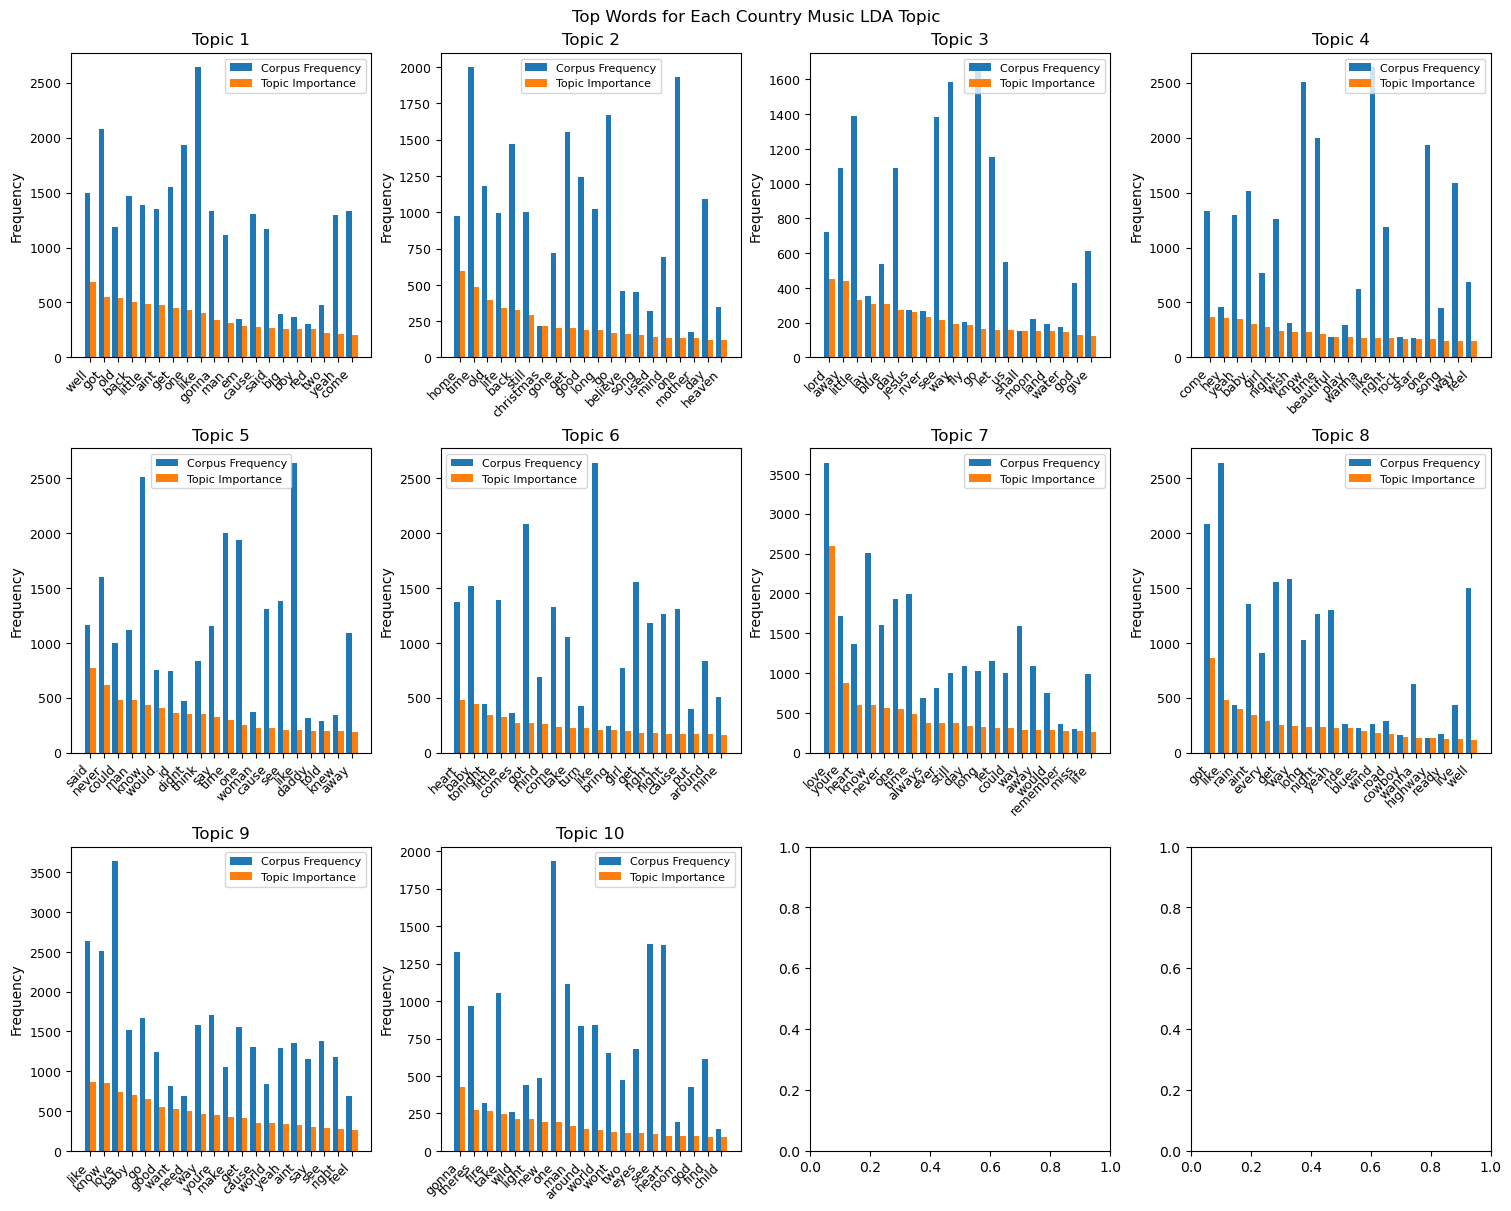

In [112]:
n_topics = len(top_words_per_topic)
n_top_words = 15

n_rows = 3
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12), constrained_layout=True)
axes = axes.flatten()

for idx, (topic_name, topic_words) in enumerate(top_words_per_topic):
    ax = axes[idx]
    words, topic_scores, corpus_freqs = zip(*topic_words)
    
    x = np.arange(len(words))
    ax.bar(x - 0.2, corpus_freqs, width=0.4, label='Corpus Frequency')
    ax.bar(x + 0.2, topic_scores, width=0.4, label='Topic Importance')
    
    ax.set_xticks(x)
    ax.set_xticklabels(words, rotation=45, ha='right')
    ax.set_title(topic_name)
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='both', which='major', labelsize=9)
    ax.legend(fontsize=8)

fig.suptitle("Top Words for Each Country Music LDA Topic")
plt.show()

Let us look at specific songs from each topic to provide more context for interpreting the topics.  First, we will obtain the LDA matrix containing documents and coressponding topics, and assign each song its most prevalent topic.  Songs can then be grouped by their most prevalent topics, and a song from each topic can be sampled for lyric analysis.

In [9]:
doc_topic_matrix = lda.transform(X)

country_songs['top_topic'] = doc_topic_matrix.argmax(axis = 1)

In [68]:
# Function that samples one song from the given topic in topic_no
def sample_song_from_topic(topic_no):
        topic_songs = country_songs[country_songs['top_topic'] == (topic_no - 1)].sample(1, random_state = 3350)
        for idx, row in topic_songs.iterrows():
            wrapper = textwrap.TextWrapper(width=80)
            print("Lyrics:")
            formatted_lyr = wrapper.fill(row['lyrics'])
            print(formatted_lyr)
            print("\n")

In [69]:
sample_song_from_topic(1)

Lyrics:
I hear tell you're doin' well Good thing have come to you I wish I had your
happiness And you had a do-wacka-do Wacka do, wacka-do, wacka-do They tell me
you're runnin' free Your days are never blue I wish I had your good-luck charm
And you had a do-wacka-do Wacka do, wacka-do, wacka-do Yeah, I see you're goin'
down the street in your big Cadillac You got girls in the front, you got girls
in the back Yeah, way in back, you got money in a sack Both hands on the wheel
and your shoulders rared back Root-doot-doot-doot-doot, do-wah  I hear tell
you're doin' well Good things have come to you I wish I had your happiness And
you had a do-wacka-do Wacka do, wacka-do, wacka-do  (Nonsense syllable
interlude)  Yeah, I see you're goin' down the street in your big Cadillac You
got girls in the front, you got girls in the back Yeah, way in back, you got
money in a sack Both hands on the wheel and your shoulders rared back Root-doot-
doot-doot-doot, do-wah  I hear tell you're doin' well Good 

Topic 1 sees the use words such as 'well' (which is the most important word in this topic), 'got,' 'back,' and 'gonna.'  The words alone make it hard to discern a clear theme from this topic, but after seeing how the word 'well' is used in the sampled song, it is likely about a person's quality of life, and the posession of different things that influence this.  In the case of this song, the 'things' in question are a car and 'girls.'  Given this context, this topic can be assigned the label 'Quality of Life' (not referring to quality of life in the traditional sense, but rather in the context of posessions and experiences that may be important to the genre itself).

In [70]:
sample_song_from_topic(2)

Lyrics:
[Verse 1] The broken clock is a comfort, it helps me sleep tonight Maybe it can
stop tomorrow from stealing all my time I am here still waiting though i still
have my doubts I am damaged at best, like you've already figured out  [Chorus]
I'm falling apart, I'm barely breathing With a broken heart that's still beating
In the pain, there is healing In your name I find meaning  [Verse 2] The broken
lights were a warning you got inside my head I tried my best to be guarded, I'm
an open book instead I still see your reflection inside of my eyes That are
looking for a purpose, they're still looking for life  I'm falling apart, I'm
barely breathing With a broken heart that's still beating In the pain, oh, is
there healing In your name I find meaning  I'm hanging on another day Just to
see what you throw my way And I'm hanging on  The broken lights on the freeway
Left me here alone I may have lost my way now Haven't forgotten my way home  I'm
falling apart, I'm barely breathing With a 

Topic 2 sees the use of words such as 'home,' 'old,' life,' 'back,' 'used,' and 'heaven.'  When taken together these words imply a sadder theme -- perhaps one that has to do with sadness, and lamenting past aspects of life.  Examining the sample song reinforces this, as it talks about pain and negative emotions in the context of losing time.  As a result, this topic can be assigned the label 'Lost/Past Aspects of Life.'

In [71]:
sample_song_from_topic(3)

Lyrics:
[Chorus] Rise up, Lazarus, rise up from the dust If in Jesus you believe, you
shall be released Go forth, John and Paul, spread the Gospel to them all Give
them courage to believe and they shall be released  [Verse 1] Now Jesus went to
Bethany in answer to an urgent plea Two sisters fell down at his feet, they
began to cry and weep They led Him to their brother's grave, Jesus knelt to God
and prayed  [Chorus] Rise up, Lazarus, rise up from the dust If in Jesus you
believe, you shall be released Go forth, John and Paul, spread the Gospel to
them all Give them courage to believe and they shall be released  [Verse 2] Now
doubters who had not believed spread the word of what they'd seen Then they
began to congregate, first two to four, then four to eight God watched the
faithful multiply as they echoed Jesus' cry  [Chorus] Rise up, Lazarus, rise up
from the dust If in Jesus you believe, you shall be released Go forth, John and
Paul, spread the Gospel to them all Give them courage t

Topic 3 sees the importance of words such as 'lord,' 'jesus,' and 'god,' which imply a very religious theme.  However, nature related words such as 'river,' 'moon,' and 'land,' are also among the most important words in this topic.  This suggests a theme of religion in the context of nature (god's creations).  The sample song is extremely religious in a Christian sense, further enforcing this interpretation.  Consquently, this topic will be assigned the label of 'Religion - Nature.'

In [72]:
sample_song_from_topic(4)

Lyrics:
[Verse 1] Summertime is finally here That old ballpark, man, is back in gear Out
on 49 Man I can see the lights  School's out and the nights roll in Man, just
like a long lost friend You ain't seen in a while And can't help but smile
[Pre-Chorus] And it's two bare feet on the dashboard Young love and an old Ford
Cheap shades and a tattoo And a Yoo-Hoo bottle on the floorboard  [Chorus]
Perfect song on the radio Sing along cause it's one we know It's a smile, it's a
kiss It's a sip of wine, it's summertime Sweet summertime  [Verse 2] Temperature
says 93 Down at the Deposit and Guarantee But that swimming hole It's nice and
cold  Bikini bottoms underneath But the boys' hearts still skip a beat When them
girls shimmy off Them old cutoffs  [Pre-Chorus] And it's two bare feet on the
dashboard Young love and an old Ford Cheap shades and a tattoo And a Yoo-Hoo
bottle on the floorboard  [Chorus] Perfect song on the radio Sing along cause
it's one we know It's a smile, it's a kiss It's 

When looking at Topic 4's most important words, it seems to suggest a theme that is in line with some of the stereotypes about the Country Music genre.  Words such as 'come,' 'baby,' 'beautiful,' and 'rock' imply that this topic has to do with females in the male gaze, where they are viewed in the context of male attraction.  The sample song reinforces this, as it talks about partying, and the physical aspects of women that men might stereotypically be attracted to.  This topic can be assinged the label 'Romance/Women - Stereotypical.'

In [73]:
sample_song_from_topic(5)

Lyrics:
[Verse 1] She had eyes like diamonds and they caught the light Oh, but they were
dark and deeper than the night  [Chorus] But when she'd smile, out came the sun
And there ain't no more where that came from  [Verse 2] She had a dress that
swayed all around her knees And a voice as soft as a summer breeze  [Chorus] A
touch that told me I was the one And there ain't no more where that came from
[Bridge] I must have said to myself, there might be somebody else Out there,
somewhere I must have said to myself, it's a great big world Girls are
everywhere  [Chorus] Oh, but now I know, there was only one And there ain't no
more where that came from And it ain't like I ain't been trying to find someone
There just ain't no more where that came from  [Outro] Oh, where that came from




Topic 5's most important words feature 'said,' 'never,' 'know,' 'think, 'woman,' 'daddy,' and 'knew.'  There seems to be an emphasis on thought and knowledge here, but 'woman' is still in the 15 most important words to this topic.  This implies a theme that may be centered around women, but in a way that is more thoughtful and involves aspects other than stereotypically physcially attractive attributes.  The sample song supporst this, involving a person lamenting the loss of a woman like no other.  This topic can be assigned the label 'Romance/Women - Thoughtful.'

In [75]:
sample_song_from_topic(6)

Lyrics:
[Verse] How foolish can you be to be ruled by jealousy? Could you throw away
what we planned? Why don't you ask your heart, ask it if we should part? I need
to tell my heart exactly where we stand  [Chorus] So, let's have a heart-to-
heart talk Let's have an arm in arm walk My darlin', let's try to see eye to eye
And let's have a heart-to-heart talk  [Instrumental Break]  [Chorus] So, let's
have a heart-to-heart talk Let's have an arm in arm walk My darlin', let's try
to see eye to eye And let's have a heart-to-heart talk




Topic 6's most important words include 'heart,' 'baby,' 'mind,' 'take,' 'girl,' and 'mine.'  This suggests that this topic is also romantic in nature, as 'heart' is the most important word to the topic.  The inclusion of 'mind' and 'girl' insinuate that this topic most likely does involve women, but in a way that might not be stereotypical -- instead it may involve more emotional and relationship aspects.  This topic will be assinged the label 'Romance/Women - Relationships.'

In [76]:
sample_song_from_topic(7)

Lyrics:
[Verse] I'll hold you in my heart till I can hold you in my arms Like you'd
never been held before I'll think of you each day, and then I'll dream the night
away Till you are in my arms once more  [Chorus] The stars up in the sky know
the reason why I feel so blue when I'm away from you I'll hold you in my heart
till I can hold you in my arms So darlin', please wait for me  [Instrumental
Break]  [Chorus] The stars up in the sky know the reason why I feel so blue when
I'm away from you I'll hold you in my heart till I can hold you in my arms So
darlin', please wait for me




Topic 7 assigns importance to words such as 'love', 'heart,' 'know' 'always,' 'ever,' 'still', 'remember,' and 'miss.'  These words very strongly suggest a romantic topic, but in the context of time and memories.  The sample song aligns with this, mentioning the author's remembered love for a person who may have passed away.  This tpic will be assigned the label 'Romance - Rememberance.'

In [77]:
sample_song_from_topic(8)

Lyrics:
They got a vintage Victrola 1951 Full of my favorite records that I grew up on
They got ole Hank and Lefty and there's B24 Set 'em up Joe, and play 'Walking
The Floor' Set 'em up Joe, and play 'Walking The Floor' I'm gonna spend the
night like every night before Playin' ET and I'll play him some more I've gotta
have a shot of them old troubadours  Set 'em up Joe, and play 'Walking The
Floor' Set 'em up Joe, and play 'Walking The Floor'  All my neon neighbors they
like what I play Cause they've heard it every night since you've walked away
Every day they replace old B24 'Cause every night I run a needle through
'Walking The Floor'  Every night I run a needle through 'Walking The Floor' I'm
gonna spend the night like every night before Playin' ET and I'll play him some
more I've gotta have a shot of them old troubadours  Set 'em up Joe, and play
'Walking The Floor' Set 'em up Joe, and play 'Walking The Floor' I said set 'em
up Joe, and play 'Walking The Floor'




This topic features words such as 'ride,' 'blues,' 'wind,' 'road,' 'cowboy,' 'highway,' and 'live.'  This suggests a theme more aligned with life experience in terms of the authors' surrounding environments and daily occurrences.  The sample song, which mentions listening to vinyl records from the singer's childhood aligns with this.  Thus, topic 8 will be assigned the label 'Country Lifestyle.'

In [78]:
sample_song_from_topic(9)

Lyrics:
[Verse 1] Mama told her baby, "Girl, take it real slow" Girl told her mama,
"Hey, I really gotta go He's waitin' in the car" Mama said, "Girl, you won't get
far"  [Verse 2] Thus are the dreams of an average Jane Ninety miles an hour down
a lover's lane On a tank of dreams Oh, if she could have only seen  [Pre-Chorus]
But fate's got cards that it don't wanna show  [Chorus] And that boy's just a
walkaway Joe Born to be a leaver, tell you from the word go Destined to deceive
her, he's the wrong kind of paradise She's gonna know it in a matter of time
That boy's just a walkaway Joe  [Verse 3] Now just a little while into Abilene
Pulls into a station and he robs it clean She's waitin' in the car Underneath
the Texaco star  [Verse 4] She only wanted love, didn't bargain for this She
can't help but love him for the way he is She's only seventeen And there ain't
no reasoning  [Pre-Chorus] So she'll ride this ride as far as it can go
[Chorus] 'Cause that boy's just a walkaway Joe Born t

This topic features words such as 'like,' 'know,' 'love,' 'baby,' 'world,' and 'feel.'  Looking only at the most imortant words, it is hard to assign this topic a specific theme -- it seems to have to do with knowledge and experiences having to do with romance and love.  The sample song chronicles a woman's experience with love, a relationship, and its consequences.  With this context, we can tenatively assign this topic the label 'Romance - Personal Experiences.'  Note that 'personal' does not refer necessarily to the author, but whoever the subject of the song is (songs in this topic likely have a subject due to 'youre' being an important word).

In [79]:
sample_song_from_topic(10)

Lyrics:
[Intro] I was totin' my pack along the dusty Winnemucca road When along came a
semi with a high an' canvas covered load "If you're goin' to Winnemucca, Mack,
with me you can ride" And so I climbed into the cab and then I settled down
inside He asked me if I'd seen a road with so much dust and sand And I said,
"Listen, I've traveled every road in this here land"  [Chorus] I've been
everywhere, man I've been everywhere, man Crossed the desert's bare, man I've
breathed the mountain air, man Of travel I've a-had my share, man I've been
everywhere  [Verse 1] I've been to Reno, Chicago, Fargo, Minnesota Buffalo,
Toronto, Winslow, Sarasota Wichita, Tulsa, Ottawa, Oklahoma Tampa, Panama,
Mattawa, La Paloma Bangor, Baltimore, Salvador, Amarillo Tocopilla,
Barranquilla, and Padilla, I'm a killer  [Chorus] I've been everywhere, man I've
been everywhere, man Crossed the desert's bare, man I've breathed the mountain
air, man Of travel I've a-had my share, man I've been everywhere  [Verse 2]

Topic 10 is an interesting one -- its most important words include 'fire,' 'wild,' 'new,' 'man,' 'world,' 'eyes,' 'see,' 'god,' 'child,' and 'find.'  These words suggest a theme of worldy experiences nad possibly coming of age.  The sample song details the subject's experiences traveling the world, which supports this notion.  As a result, this topic can be assigned the label 'Worldly Experience.'

We can put these labels into a dictionary so that later visualizations can use them:

In [80]:
topic_no_to_label = {
    1: "Quality of Life",
    2: "Lost/Past Life Aspects",
    3: "Religion-Nature",
    4: "Romance/Women - Stereotype",
    5: "Romance/Women - Thoughtful",
    6: "Romance/Women - Relationships",
    7: "Romance - Rememberance",
    8: "Country Lifestyle",
    9: "Romance - Personal Exp.",
    10: "Worldy Experience"
}

We can also view which topics were the most frequent in the corpus as a whole, to get a better idea for the genre's dominant themes by plotting topic frequencies:

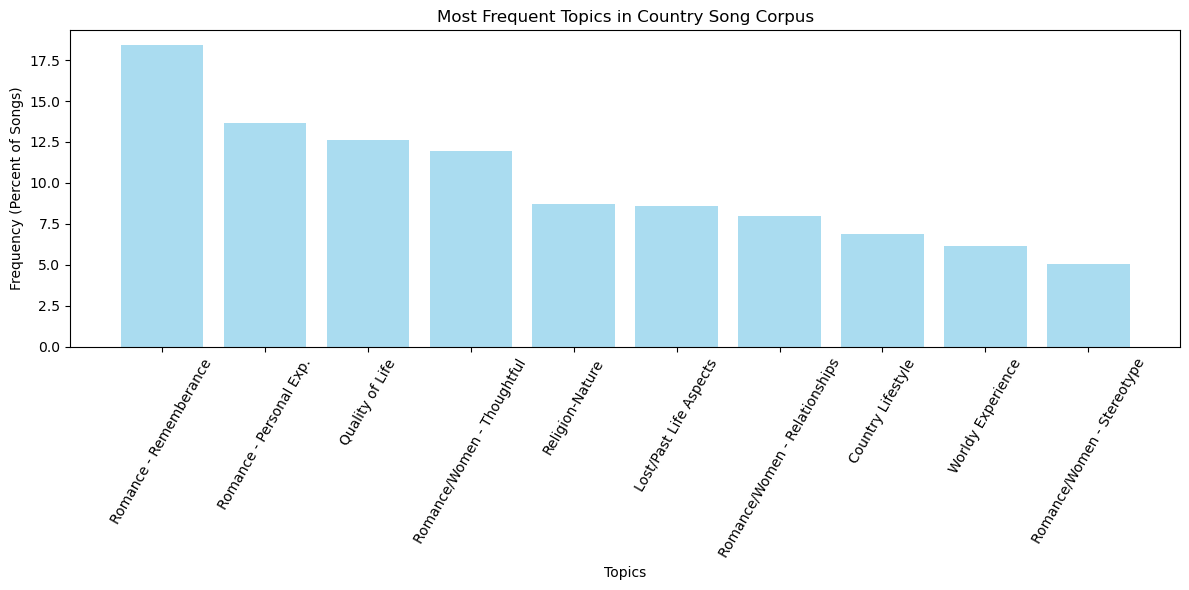

In [111]:
topic_frequencies = doc_topic_matrix.sum(axis=0)

topic_frequencies_percentage = (topic_frequencies / topic_frequencies.sum()) * 100

sorted_topic_indices = np.argsort(topic_frequencies_percentage)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(
    [topic_no_to_label[i+1] for i in sorted_topic_indices],
    topic_frequencies_percentage[sorted_topic_indices],
    color="skyblue",
    alpha=0.7
)
plt.title("Most Frequent Topics in Country Song Corpus")
plt.xlabel("Topics")
plt.ylabel("Frequency (Percent of Songs)")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

By far the most frequent topic in the corpus is Topic 8, a topic that appears to be romantic in terms of its theme.  The next two most frequent topics are 2 and 9, which have to do with male/father figure's words and actions, and aspects of a human's knowledge and needs in the context of time respectively.

Because LDA is unsupervised, it is difficult to conduct traditional tests of statistical significance on topic modeling.  However, we can look at the identified topics in relation to eachother, to see how distinct they actually are.  I decided to use this using KL divergence, which measures the difference between probablity distributions.  This made sense to use as a measure of distinctiveness between topics, because each topic is essentially a probability distribution of words, and topics are assumed to be distributed over documents as well.  To calculate this, I calculated the kl diverjence between each pair of topics, using entropy, and visualized the results in the below matrix:

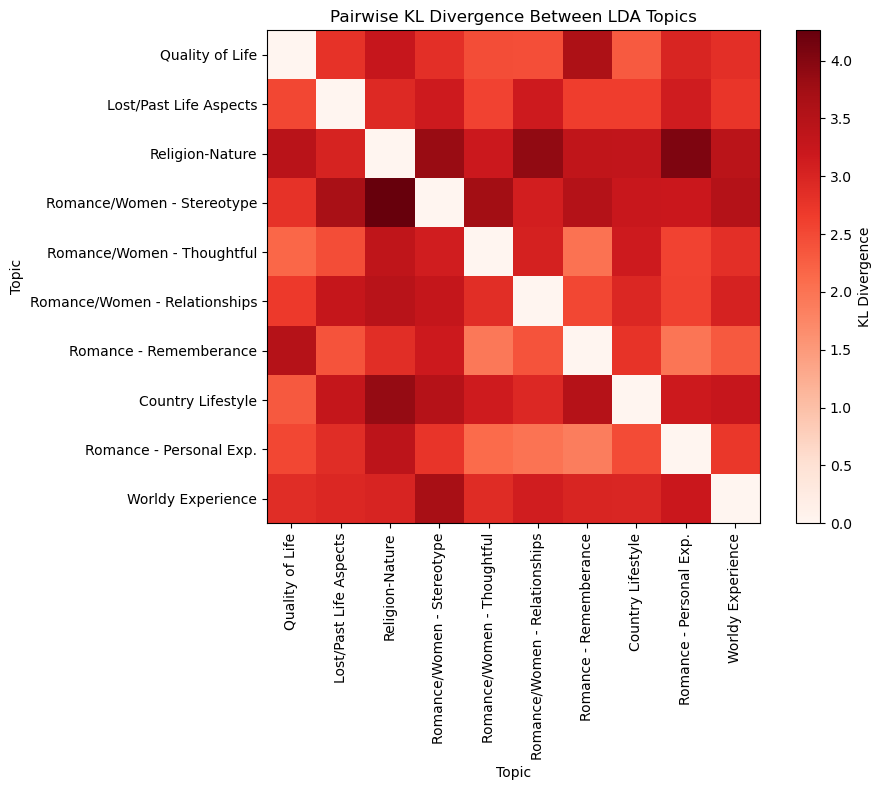

In [110]:
# Divide topics by the sum of topics (need normalization for entropy)
normalized_topic_distributions = topics / topics.sum(axis=1, keepdims=True)

n_topics = normalized_topic_distributions.shape[0]
pairwise_kl = np.zeros((n_topics, n_topics))

# Calculate entropy for each pair of topics, unless of course they are the same topic
for i in range(n_topics):
    for j in range(n_topics):
        if i != j: 
            pairwise_kl[i, j] = entropy(normalized_topic_distributions[i], normalized_topic_distributions[j])

plt.figure(figsize=(10, 8))
plt.imshow(pairwise_kl, cmap='Reds')
plt.colorbar(label='KL Divergence')
plt.title("Pairwise KL Divergence Between LDA Topics")
plt.xlabel("Topic")
plt.ylabel("Topic")
plt.xticks(range(n_topics), [topic_no_to_label[i+1] for i in range(n_topics)], rotation=90)
plt.yticks(range(n_topics), [topic_no_to_label[i+1] for i in range(n_topics)])
plt.tight_layout()
plt.show()


A higher KL divergence means a greater difference in distributions, and distinction between topics.  As we can see from the matrix, the topics that are most distinct from each other are Religion/Nature and Romance/Women - Stereotypical.  From a purely intuitive standpoint this makes sense -- there is likelly not much overlap between songs referencing religion and songs referencing women and singer/subjects' atrraction to them in a physical manner.  The topic pairs that have the smallest KL divergences are also interesting, but not surprising.  Romance - Personal Experiences has relatively smaller values when paired with Romance/Women - Thoughtful, Romance/Women - Relationships, and Romance - Rememberance compared to the surrounding pairs.  All of these topics discuss romance in a manner that is less stereotypical, which is likely why they are so similar.

It is important to note though, that most pairwise differences ahave KL divergences of around 2.5 and above, suggesting that they are above moderately to significantly distinct from eachother.  This instills some confidence that the LDA model was actually able to identify distinct topics that are still representative of the entire corpus as a whole.

### Analyzing Differences Between Male and Female Artist's Songs

The research question and hypothesis being analyzed also had a component having to do with the gender of the artist -- we want to explore whether the prevalent topic of a country song changes depending on whether the song artist was male or female.  First, we will construct the dataframe that we will use in the analysis:

In [104]:
# Function to get topic's corresponding label
def get_topic_label(topic_no):
    return topic_no_to_label[topic_no + 1]

To assign artsits' gender, I simply looked up the artists I did not know, and saved their genders and names to 'top_artists_annot.csv.'  While it may have been possible to use an API or scrape data to figure this out, googling the information was much faster than the research and debugging that the former method would have require, so I used manual assignment.

In the case of artists that were multiple people, there was only one group that was not comprised of all males or all females.  I assigned this group the label 'n', an did not include them in this portion of the analysis:

In [90]:
artist_genders = pd.read_csv('top_artists_annot.csv')
songs_w_gender = pd.merge(country_songs, artist_genders, left_on = 'artist', right_on = 'Artist', how = 'left')
songs_w_gender = songs_w_gender[songs_w_gender['Gender'] != 'n']
songs_w_gender['topic_label'] = songs_w_gender['top_topic'].apply(lambda x: get_topic_label(x))
songs_w_gender.head()

,artist,song_title,lyrics,cleaned_lyrics,top_topic,Artist,Gender,topic_label
0,Dolly Parton,Jolene,"[Guitar Intro]\n\n[Chorus]\nJolene, Jolene, Jo...","Jolene, Jolene, Jolene, Jolene Im beggin of yo...",8,Dolly Parton,f,Romance - Personal Exp.
1,Dolly Parton,9 to 5,[Verse 1]\nTumble out of bed and I stumble to ...,Tumble out of bed and I stumble to the kitchen...,0,Dolly Parton,f,Quality of Life
2,Dolly Parton,Coat of Many Colors,[Verse 1]\nBack through the years I go wanderi...,Back through the years I go wandering once aga...,4,Dolly Parton,f,Romance/Women - Thoughtful
3,Dolly Parton,I Will Always Love You,[Verse 1]\nIf I should stay\nI would only be i...,If I should stay I would only be in your way S...,6,Dolly Parton,f,Romance - Rememberance
4,Dolly Parton,World On Fire,"[Intro]\nOh-oh\n\n[Chorus]\nLiar, liar, the wo...","Oh-oh Liar, liar, the worlds on fire What you ...",9,Dolly Parton,f,Worldy Experience


Now that we have a dataframe whose rows feature the song's most prevalent topic, the label fo the topic, and the gender of the artist, we can begin our analysis by ranking the topics by frequency -- this time separated by gender.

In [103]:
#Separate songs by gender of artist
male_songs = songs_w_gender[songs_w_gender['Gender'] == 'm']
female_songs = songs_w_gender[songs_w_gender['Gender'] == 'f']
# Calculate the number of times each topic/topic label occurs in each gender's songs
male_topic_counts = male_songs['topic_label'].value_counts()
female_topic_counts = female_songs['topic_label'].value_counts()
# Formate Dataframes for each gender so that they can be printed properly
# (Column names, sorting)
male_topic_df = male_topic_counts.reset_index()
male_topic_df.columns = ['Topic', 'Frequency']
male_topic_df = male_topic_df.sort_values(by='Frequency', ascending=False)

female_topic_df = female_topic_counts.reset_index()
female_topic_df.columns = ['Topic', 'Frequency']
female_topic_df = female_topic_df.sort_values(by='Frequency', ascending=False)

print("Top Topics for Male Artists:")
print(male_topic_df)

print("\nTop Topics for Female Artists:")
print(female_topic_df)


Top Topics for Male Artists:
                           Topic  Frequency
0         Romance - Rememberance        337
1                Quality of Life        285
2     Romance/Women - Thoughtful        223
3        Romance - Personal Exp.        199
4         Lost/Past Life Aspects        156
5                Religion-Nature        140
6  Romance/Women - Relationships        118
7              Country Lifestyle        108
8              Worldy Experience         80
9     Romance/Women - Stereotype         51

Top Topics for Female Artists:
                           Topic  Frequency
0         Romance - Rememberance        164
1        Romance - Personal Exp.        137
2     Romance/Women - Thoughtful         69
3                Quality of Life         53
4  Romance/Women - Relationships         45
5         Lost/Past Life Aspects         40
6                Religion-Nature         38
7              Country Lifestyle         29
8              Worldy Experience         25
9     Romance/W

We can visualize these frequencies using bar charts:

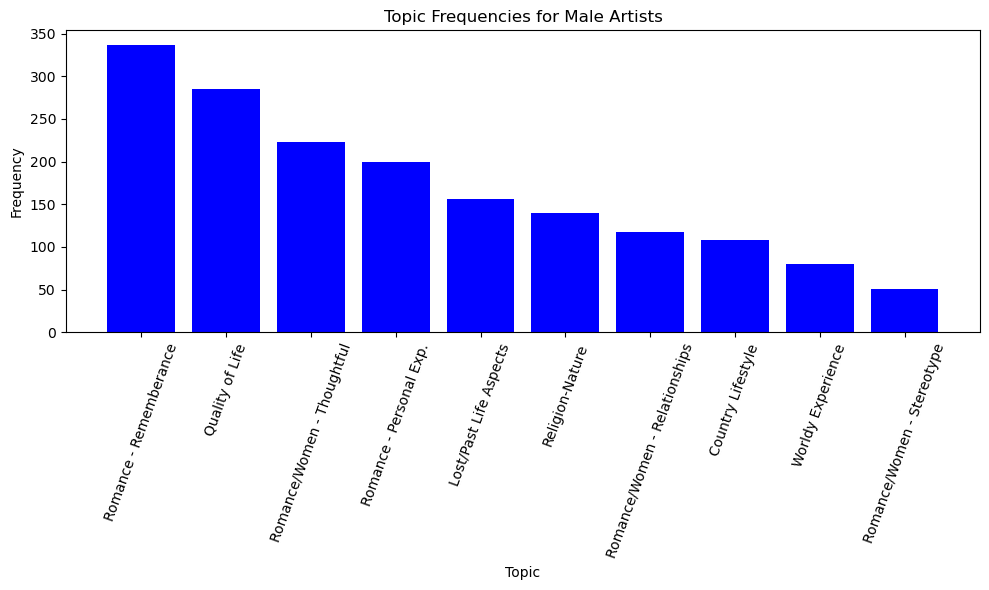

In [102]:
plt.figure(figsize=(10, 6))
plt.bar(male_topic_df['Topic'].astype(str), male_topic_df['Frequency'], color='blue')
plt.title('Topic Frequencies for Male Artists')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

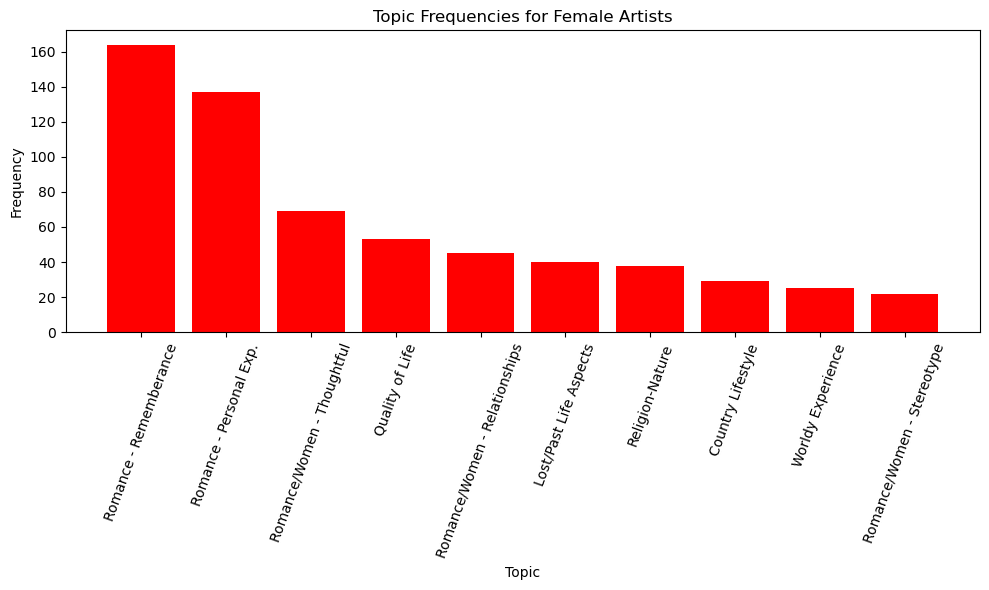

In [101]:
plt.figure(figsize=(10, 6))
plt.bar(female_topic_df['Topic'].astype(str), female_topic_df['Frequency'], color='red')
plt.title('Topic Frequencies for Female Artists')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

Upon the initial visual analysis, the results are surprising!  The most frequent prevalent topic is the same for both male and female artists, as is the least frequent prevalent topic.  Both male and female artists see the Romance/Women - Stereotypical topic with the least frequency, and see Romance - Rememberance with the most.  Country Lifestyle and Worldly Experience are also the third and second least frequent prevalent topics for both genders of artists.  Female artists do seem to have higher relative frequencies of Romance related topics other than the stereotypical one when compared to male artists, however.

To further analyze whether the difference in prevalent topics based on artist gender is statistically significant, we will conduct a permutation test with 1000 permutations for each topic.  For each topic's 1000 iterations, we will calculate the difference in that topics proportion out of all songs of each gender, between genders.  Comparing this to the actual observed difference in our dataset will give insight into which topics (if any) actually have a statistically significant difference in proportion between genders!

In [ ]:
n_permutations = 1000

for topic_id in range(lda.n_components):
    # Calculate the actual/observed proportions for each topic in both genders!
    male_proportion = male_topic_counts.get(topic_id, 0) / male_topic_counts.sum()
    female_proportion = female_topic_counts.get(topic_id, 0) / female_topic_counts.sum()
    observed_difference = abs(male_proportion - female_proportion)

    randomized_diffs = []
    for _ in range(n_permutations):
        # Permuting the gender column
        rand_gend = songs_w_gender['Gender'].sample(frac=1, replace=False).values
        rand_df = songs_w_gender.copy()
        rand_df['Gender'] = rand_gend
        # Separating the songs by gender
        shuffled_male_songs = rand_df[rand_df['Gender'] == 'm']
        shuffled_female_songs = rand_df[rand_df['Gender'] == 'f']
        # Calculating the propotions in the permutation
        shuffled_male_topic_counts = shuffled_male_songs['top_topic'].value_counts(normalize=True)
        shuffled_female_topic_counts = shuffled_female_songs['top_topic'].value_counts(normalize=True)
        # Taking the differences for this iteration
        shuffled_diff = abs(
            shuffled_male_topic_counts.get(topic_id, 0) - shuffled_female_topic_counts.get(topic_id, 0)
        )
        randomized_diffs.append(shuffled_diff)

    p_value = (np.array(randomized_diffs) >= observed_difference).mean()
    print(f"{get_topic_label(topic_id)}: Observed Difference = {observed_difference:.4f}, P-Value = {p_value:.4f}")


C:\Users\adika\AppData\Local\Temp\ipykernel_35760\582049863.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_proportion = male_topic_counts.get(topic_id, 0) / male_topic_counts.sum()
C:\Users\adika\AppData\Local\Temp\ipykernel_35760\582049863.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_proportion = female_topic_counts.get(topic_id, 0) / female_topic_counts.sum()


Quality of Life: Observed Difference = 0.0651, P-Value = 0.0000
Lost/Past Life Aspects: Observed Difference = 0.0523, P-Value = 0.0000
Religion-Nature: Observed Difference = 0.0205, P-Value = 0.0960
Romance/Women - Stereotype: Observed Difference = 0.0321, P-Value = 0.0000
Romance/Women - Thoughtful: Observed Difference = 0.0196, P-Value = 0.1920
Romance/Women - Relationships: Observed Difference = 0.0182, P-Value = 0.1330
Romance - Rememberance: Observed Difference = 0.0084, P-Value = 0.6360
Country Lifestyle: Observed Difference = 0.0170, P-Value = 0.1300
Romance - Personal Exp.: Observed Difference = 0.0069, P-Value = 0.6150
Worldy Experience: Observed Difference = 0.0053, P-Value = 0.5740


Keeping in mind that with the Beonferroni correction we are comparing p-values for each topic against an alpha value of 0.005, we find that:

The difference in topic proportions between male and female country artists is statistically significant for the following topics:

- Quality of Life
- Lost/Past Life Aspects
- Romance/Women - Stereotype

The difference in topic proportions is not statistically significant for the following topics:

- Religion-Nature
- Romance/Women - Thoughtful
- Romance/Women - Relationships
- Romance - Rememberance
- Country Lifestyle
- Romance - Personal Experience
- Worldy Experience

## Discussion & Conclusions

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The purpose of the first part of this analysis was to determine whether or not the dominant topics and themes in the Country Music genre aligned with the stereotypical assumptions about the genre -- that country songs mostly discuss themes having to do with partying, alcohol, and women from the perspective of men.  Using LDA, we obtained 10 topics from the corpus of song lyrics.  Of the 10 topics, whose likely meanings were discussed above, only one seemed to align closely with the stereotypical themes discussed in the Introcution and Research question, and this was the Romance/Woman - Stereotype topic.  Of the 10 topics, this ended up being the least frequent topic in the country music lyrics dataset as a whole, only appearing in ~6% of the songs.  While this does seem promising in terms of the first part of my hypothesis, I do not think it is enough to draw a concrete conclusion.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We cannot draw a concrete conclusion because of the subjectiveness of topic interpretation.  This is especially important when considering the topics that I labeled as Romance - Rememberance, Romance - Personal Experience, Romance/Women - Thoughtful, and Romance/Women - Relationships.  These topics, which occured in around 18%, 13%, 11.5%, and 7.5% of the songs in the dataset respectively, all featured words that suggested romantic themes.  Some words, such as 'heart,' and 'girl/woman,' overlapped between these themes and the Romance/Woman Stereotypical topic.  While I interpreted these themes as not being the stereotypical context of romance and attraction, this is not a fact.  These might not be the entirely correct interpretations of these topics, and in actuality, some of these topics may represent themes that society would consider stereotypical.  And if this were true, we have to consider that this would result in 5/10 topics being stereotypical in the 'perception-of-women' sense alone!

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As a result, I feel that the analysis is **inconclusive in determining whether or not the most prevalent themes in country music align with society's stereotypes about the genre.**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;While statstical significance was not as easy to test for an unsupervised model such as LDA, the topic/themes' distinctiveness from eachother was still considered.  To do this, the KL divergence for each pair of topics was calculating using entropy, to see how different each topic's distribution was from all of the other topics.  This serves as a marker for seeing how effective LDA was at actually identifying a diverse group of topics when it comes to their content.  The most distinct topic pair was Religion-Nature and Romance/Women - Stereotype, with a divergence of around 4.3.   This makes sense based on intuition alone -- genuine mentions of religion seem vastly different from stereotypical mentions of attraction to women.  In this case, this provides a little assurance that the topic interpretations were on the right track, since the interpretations' differences align with the probability distributions'.  The same goes for topics pairs with low relative KL divergences, such as Romance - Personal Experiences paired with Romance/Women - Thoughtful, Romance/Women - Relationships, and Romance - Rememberance, which had divergences of ~ 2, 1.75, and 1.5 respectively. Overall, though the KL divergence values are reasonably high -- with most ranging from 2.5 to 4.3.  This suggests reasonable distinctiveness of topics, suggesting that LDA identified ones that highlight multiple different undertones in the corpus of country music lyrics.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The second part of my analysis determined whether or not there was a statistically significant difference between the proprotion of songs that each of the 10 LDA-identified topics was present in, between songs by male and female artists.  In my analysis, the phrase 'present in' meant that the topic in question was the most prevalent (important) topic in a song.  We first split the songs by artist gender, and looked at the most frequent topics by occurence.  Surprisingly, the most frequent and least frequent topics were the same for songs by male and female artists in my dataset -- being Romance-Rememberance and Romance/Women - Stereotypical respectively.  Other than the second and third least frequent topics of World Experience and Country Lifestyle respectively, the topics did seem to differ in terms of ranked relative frequency between artist genders.  This was only visually though -- to be sure, I conducted a significance test via permutations of the dataset.  The results of this permutation test were as follows: the topics of Quality of Life, Lost/Past Life Aspects, and Romance/Women - Stereotypical all had significant differences in proportion between male and female artists' songs, as all of these topics' p-values were less than our alpha of 0.005.  For all of the other 7 topics, however, the p-values pertaining to the difference in proportions exceed 0.005.  Because the difference was not statistically signficant for all topics as I originally hypothesized, we **fail to reject the null hypothesis that there is no significant difference between the most prevalent topics in male and female artists' country songs, in terms of proportion.**


## Future Work and Takeaways:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;With access to more time, there are a couple of changes/methods I would explore in relation to my analysis.  The first has to do with evaluating the topic modeling I conducted by way of LDA.  I would most likely explore topic intrusion, which in order to have a better measure of how well the topics identified actually reflected the content of the country songs they were associated with.  I would also drastically increase the size and scope of my dataset -- while I was able to conduct a reasonable analysis using ~2300 songs, I do think that a larger amount of songs would be much more representative of the country music genre as a whole.  I also would try to consolidate artist lists from multiple sources, not just Billboard.  Although Billboard is well known and respected in the music industry, their content is ultimately subject to the opinions of their staff and their methods of analysis.  Even though no concrete conclusions were drawn, I still discovered many surprising aspects about my favorite genre of music, such as possible similarities between male and female artists' content, and the surprising prevalence of religion in the identified topics!


## References

“Country: Popular Songs of the Day: Musical Styles: Articles and Essays: The Library of Congress Celebrates the Songs of America: Digital Collections: Library of Congress.” The Library of Congress, The
Library of Congress, www.loc.gov/collections/songs-of-america/articles-and-essays/musical-styles/popular-songs-of-the-day/country/
#:~:text=The%20first%20commercial%20country%20music,Sallie%20Gooden%22%20for%20Victor%20Records. Accessed 12 Dec. 2024.

Dhinakaran, Aparna. “Understanding KL Divergence.” Medium, Towards Data Science, 22 Mar. 2023, towardsdatascience.com/understanding-kl-divergence-f3ddc8dff254. 

Geist, Lucie. “The Stereotypes Surrounding Country Music.” The Sentinel, 8 May 2024, digitalsentinel.org/3512/showcase/the-stereotypes-surrounding-country-music

Read, Michael. “Despite Stereotypes, Country Music Is Unique and Meaningful.” The Record, 5 Oct. 2016, buffstaterecord.com/7502/opinion/despite-stereotypes-country-music-is-unique-and-meaningful
